# MINMAX SCALING
    

In [47]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import pandas as pd

In [48]:
df = pd.read_csv('wine_data.csv', header=None, usecols = [0,1,2])
df.columns = ['Class Label','Alcohol', 'Malic acid']

In [49]:
df

,Class Label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: title={'center': 'KDE PLOT OF ALCOHOL'}, xlabel='Alcohol', ylabel='Density'>

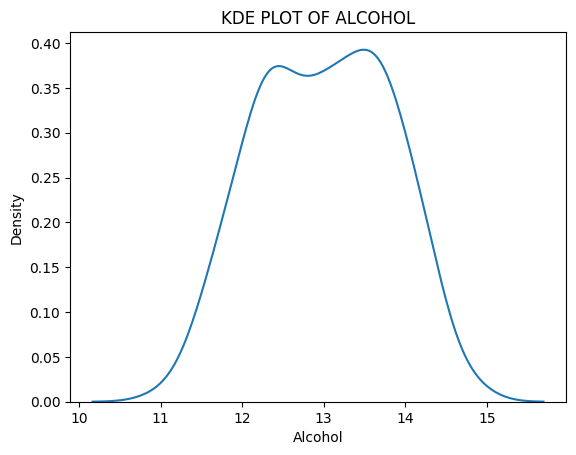

In [50]:
plt.title("KDE PLOT OF ALCOHOL")
sns.kdeplot(df['Alcohol'])

<Axes: title={'center': 'KDE PLOT OF MALIC ACID'}, xlabel='Malic acid', ylabel='Density'>

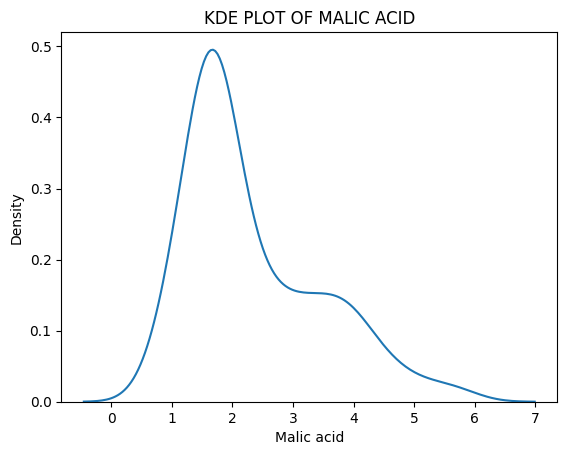

In [51]:
plt.title("KDE PLOT OF MALIC ACID")
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

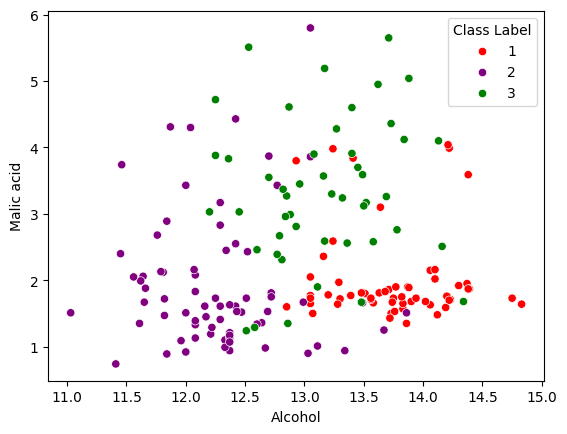

In [52]:
color_dict = {1 : 'red', 2 : 'purple', 3 : 'green'}
sns.scatterplot(data = df, x = 'Alcohol', y = 'Malic acid', hue = 'Class Label', palette = color_dict)

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

**drop() does not modify df unless you assign it back or use `inplace=True.`**

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split((df.drop('Class Label', axis = 1)), df['Class Label'], test_size = 0.2, random_state=42)

In [55]:
X_train

,Alcohol,Malic acid
158,14.34,1.68
137,12.53,5.51
98,12.37,1.07
159,13.48,1.67
38,13.07,1.50
...,...,...
71,13.86,1.51
106,12.25,1.73
14,14.38,1.87
92,12.69,1.53


In [56]:
X_train.shape, X_test.shape

((142, 2), (36, 2))

In [57]:
scaler = MinMaxScaler()
# use fit on training data
scaler.fit(X_train)
# use transform on both training and test data
X_train_scaled_data = scaler.transform(X_train)
X_test_scaled_data = scaler.transform(X_test)

In [58]:
X_train_scaled_data = pd.DataFrame(X_train_scaled_data, columns=X_train.columns)
X_test_scaled_data = pd.DataFrame(X_test_scaled_data, columns=X_test.columns)

In [59]:
np.round(X_train_scaled_data.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [60]:
X_train_scaled_data.describe()

,Alcohol,Malic acid
count,142.000000,142.000000
mean,0.512917,0.302143
std,0.215820,0.232980
min,0.000000,0.000000
25%,0.342763,0.147658
50%,0.521053,0.200611
75%,0.696711,0.457230
max,1.000000,1.000000


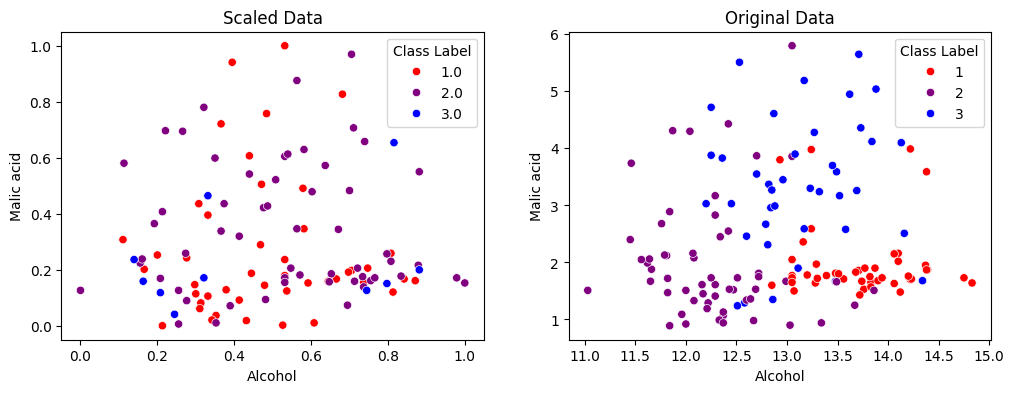

In [62]:
color_dict = {1 : 'red', 2 : 'purple', 3 : 'blue'}
fig, axes = plt.subplots(1, 2, figsize = (12,4))
sns.scatterplot(data = X_train_scaled_data, x = 'Alcohol', y = 'Malic acid', hue = Y_train , ax=axes[0], palette = color_dict)
sns.scatterplot(data = X_train, x = 'Alcohol' ,y = 'Malic acid', hue = Y_train, ax=axes[1], palette = color_dict)
axes[0].set_title('Scaled Data')
axes[1].set_title('Original Data')
plt.show()